# Trabajo de Curso VC

### Autores
Kilian Armas Pérez

Pablo Segura López

In [ ]:
# pip install torch==1.10.0+cpu torchvision==0.11.0+cpu torchaudio==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html
# pip install matplotlib
# pip install numpy
# pip install opencv-python
# pip install scipy
# pip install torchsummary
# pip install h5py
# pip install tqdm
# pip install yacs
# pip install numba
# pip install scikit-image
# pip install filterpy
# Añadir al path el ffmpeg, la carpeta bin

In [3]:
#python gen_skes.py --video fortnite.mp4 --animation
import subprocess
working_dir = "C:/Users/pablo/Desktop/Universidad/Cuarto/Visión por computador/Prácticas/Trabajo-VC/GAST-Net"
process = subprocess.Popen(["python",
                            "gen_skes.py",
                            "--video", "fortnite.mp4"
                            ], 
                            stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, cwd=working_dir)
for line in process.stdout:
    print(line,end="")

Loading YOLOv3 network.....
YOLOv3 network successfully loaded
Loading HRNet model ...
HRNet network successfully loaded
Generating 2D pose ...

  0%|          | 0/205 [00:00<?, ?it/s]No person detected!

  0%|          | 1/205 [00:00<02:03,  1.65it/s]No person detected!

  1%|          | 2/205 [00:01<02:04,  1.63it/s]No person detected!

  1%|▏         | 3/205 [00:01<02:02,  1.65it/s]No person detected!

100%|██████████| 205/205 [04:43<00:00,  1.38s/it]
Loading GAST-Net ...
GAST-Net successfully loaded
Generating 3D human pose ...
Saving 3D reconstruction...
Completing saving...


In [9]:
import numpy as np

data = np.load('./GAST-Net/output/fortnite.npz')

skeleton_data_shape = data["reconstruction"].shape
print(skeleton_data_shape)


(1, 201, 17, 3)


Animación guardada como animacion_esqueleto.mp4


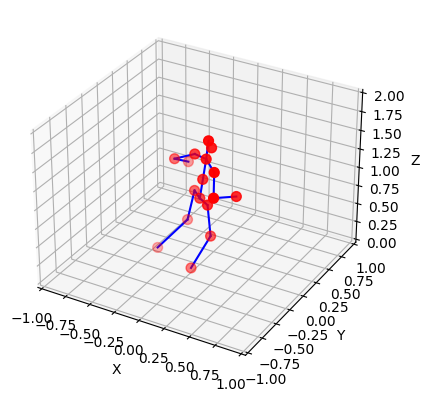

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Carga el archivo NPZ
npz_data = np.load('./GAST-Net/output/fortnite.npz')
skeleton_data = npz_data["reconstruction"]  # Clave "reconstruction"

# Verifica las dimensiones
assert skeleton_data.shape == (1, 201, 17, 3), "Las dimensiones del array no coinciden con las esperadas (1, 201, 17, 3)."

# Extrae los datos relevantes
frames = skeleton_data[0]  # Ignora la primera dimensión (número de esqueletos)
n_frames = frames.shape[0]

skeleton_connections = [
    # Pierna izquierda
    (0, 1),  # Cadera -> Rodilla izquierda
    (1, 2),  # Rodilla izquierda -> Tobillo izquierdo
    (2, 3),  # Tobillo izquierdo -> Pie izquierdo

    # Pierna derecha
    (0, 4),  # Cadera -> Rodilla derecha
    (4, 5),  # Rodilla derecha -> Tobillo derecho
    (5, 6),  # Tobillo derecho -> Pie derecho

     # Tronco
    (0, 8),  # Cadera -> Tronco (Torso)
    (8, 10),  # Tronco -> Cuello
    (8, 11),  # Tronco -> Hombro izquierdo
    (8, 14),  # Tronco -> Hombro derecho

    # Brazo izquierdo
    (11, 12),  # Hombro izquierdo -> Codo izquierdo
    (12, 13),  # Codo izquierdo -> Muñeca izquierda
    # Brazo derecho
    (14, 15),  # Hombro derecho -> Codo derecho
    (15, 16),  # Codo derecho -> Muñeca derecha
    
]


# Configura la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Animación del Esqueleto 3D")

# Función para actualizar los datos en cada frame
def update(frame_index):
    ax.clear()
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, 2])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    # Dibuja los puntos del esqueleto
    frame = frames[frame_index]
    xs, ys, zs = frame[:, 0], frame[:, 1], frame[:, 2]
    ax.scatter(xs, ys, zs, c="red", s=50, label="Articulaciones")

    # Dibuja las conexiones del esqueleto
    for start, end in skeleton_connections:
        x_coords = [frame[start, 0], frame[end, 0]]
        y_coords = [frame[start, 1], frame[end, 1]]
        z_coords = [frame[start, 2], frame[end, 2]]
        ax.plot(x_coords, y_coords, z_coords, c="blue")

# Crea la animación
ani = FuncAnimation(fig, update, frames=n_frames, interval=50)  # 50 ms por frame

# Guardar la animación como un archivo MP4
output_path = "animacion_esqueleto.mp4"  # Cambia esto al nombre de salida deseado
writer = FFMpegWriter(fps=20, metadata={"title": "Animación Esqueleto 3D"})
ani.save(output_path, writer=writer)

print(f"Animación guardada como {output_path}")
